# EMRISur1dq1e4

Notebook Author: Tousif Islam (tislam - at - umassd.edu)

The waveform model, EMRISur1dq1e4, is described in https://arxiv.org/abs/1910.10473 (Nur E. M. 2019 et. al.). 

EMRISur1dq1e4 is a surrogate gravitational-waveform model for non-spinning black hole binary systems with mass-ratios varying from 3 to $10^4$. This surrogate model is trained on waveform data generated by point-particle black hole perturbation theory (ppBHPT), with the total mass rescaling paramter tuned to NR simulations according to the paper's Eq. 4. Available modes are  $\{(2,2), (2,1), (3,3), (3,2), (3,1), (4,4), (4,3), (4,2), (5,5), (5,4), (5,3)\}$. The $m<0$ modes can be deduced from the m>0 modes due to symmetry of the system about the orbital plane. 

NOTE : This notebook rquires the file emri_sur_load.py and EMRISur1dq1e4.h5 datafile in the same directory for waveform generation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import emri_sur_load as emriSur
import scipy
from scipy.interpolate import InterpolatedUnivariateSpline as Spline
from scipy.interpolate import splrep, splev

# Evaluation example

Input: mass ratio q, and (optionally) modes to generate = [(2,1),(2,2),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),(5,3),(5,4),(5,5)]

Output: dictionary of modes with surrogate waveform

Both h and t are in geometric units

In [3]:
q = 8.0 # mass ratio
time, h_out = emriSur.generate_surrogate(q) #h_out is a dictionary with modes as key; defaults to all avail modes
time_unc, h_out_unc = emriSur.generate_surrogate(q, calibrated=False) # Directly from traning wavefrom, not calibrated

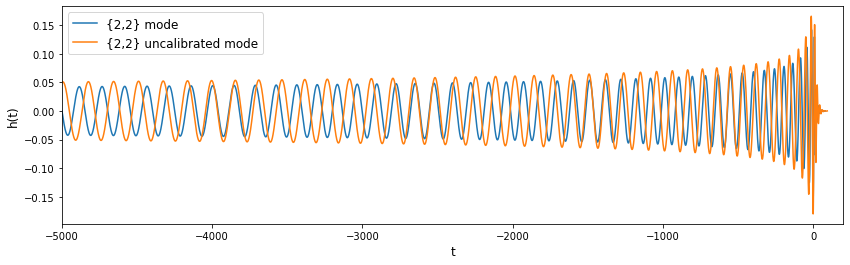

In [4]:
h_22=h_out[(2,2)]
h_22_unc= h_out_unc[(2,2)]

plt.figure(figsize=(14,4))
plt.plot(time,np.real(h_22),label='{2,2} mode')
plt.plot(time_unc,np.real(h_22_unc),label='{2,2} uncalibrated mode')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.xlim([-5000,200])
plt.show()

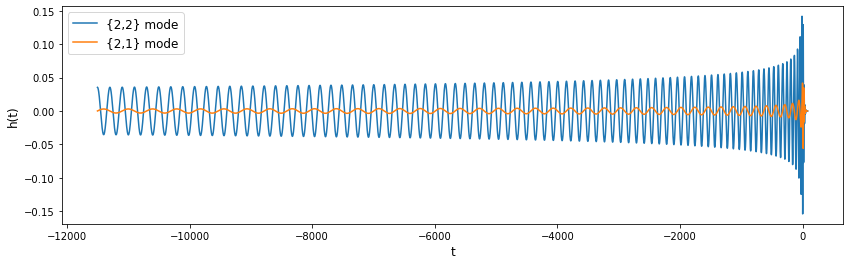

In [5]:
h_22=h_out[(2,2)]
h_21=h_out[(2,1)]

plt.figure(figsize=(14,4))
plt.plot(time,np.real(h_22),label='{2,2} mode')
plt.plot(time,np.real(h_21),label='{2,1} mode')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.show()

# Evaluation example : Physical Waveforms

Scales the waveform obtained in geometrc unit to physical units

The example below is shown for 22 mode only.

Input: total mass M (in Solar Mass unit), luminosity distance dL (Mpc)

In [6]:
G=6.674*1e-11
MSUN_SI = 1.9885469549614615e+30
PC_SI = 3.085677581491367e+16
C_SI = 299792458.0

# values of M and dL
M=80.0*MSUN_SI
dL=100.0* PC_SI
# scaling of time and h(t)
time=time*(G*M/C_SI**3)
ht22=np.array(h_out[(2,2)])*(G*M/C_SI**3)/dL

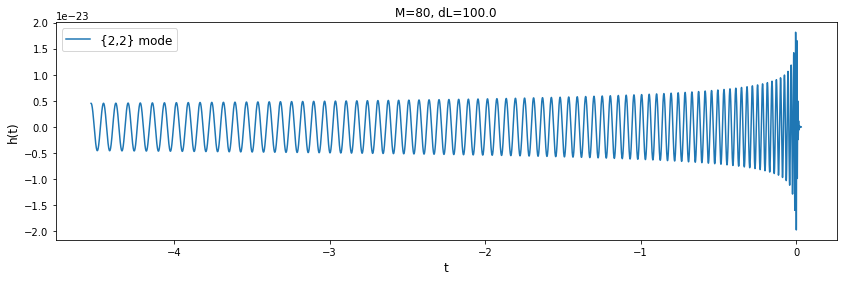

In [7]:
plt.figure(figsize=(14,4))
plt.title('M=80, dL=100.0')
plt.plot(time,np.real(ht22),label='{2,2} mode')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f_physical.png'%q)
plt.show()

## Physical Waveform

In [11]:
time_phy, h_phy = emriSur.generate_surrogate_physical(q, modes=[(2,2)], calibrated=True, M_total=80, dis=100)

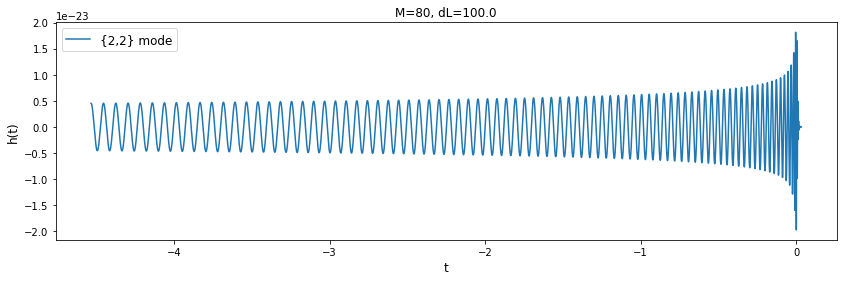

In [12]:
plt.figure(figsize=(14,4))
plt.title('M=80, dL=100.0')
plt.plot(time_phy,np.real(h_phy[(2,2)]),label='{2,2} mode')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f_physical.png'%q)
plt.show()

# Test: EMRI Surrogate vs NR

Here we repeat the experiment shown in Figure 3 (https://arxiv.org/pdf/1910.10473.pdf) which compares the EMRI surrogate model to Numerical Relativity waveforms in the range q <=10. 

Our numerical relativity waveforms will be generated using another (different) surrogate model provided in the GWSurrogate package. 

To install gwsurrogate do:

```bash
>>> pip install gwsurrogate
```

To get the numerical relativity surrogate model, open up ipython and do

```python
>>> import gwsurrogate as gws
>>> gws.catalog.pull("SpEC_q1_10_NoSpin")
```

In [ ]:
import gwsurrogate as gws
import h5py
# gws.catalog.pull(surr_name = "SpEC_q1_10_NoSpin", sdir='files')
gws.catalog.list()

In [ ]:
# model = 'SpEC_q1_10_NoSpin'
# print(gwsurrogate.catalog._surrogate_world[model].desc)
# print(gwsurrogate.catalog._surrogate_world[model].refs)

In [ ]:
# sur = gws.LoadSurrogate(model)

In [ ]:
# import gwsurrogate as gws
# gws.catalog.pull("SpEC_q1_10_NoSpin")

# gwtools is installed as a dependency of gwsurrogate
from gwtools.gwtools import modes_list_to_dict, minimize_norm_error, euclidean_norm_sqrd, q_to_nu
from gwtools.gwtools import minimize_norm_error_multi_mode
from gwtools.mismatch import mathcal_E_error_from_mode_list, mathcal_E_error_from_mode_dict

emri_modes = [(2,2),(2,1),(3,3),(3,1),(3,2),(4,4),(4,2),(4,3),(5,5),(5,3),(5,4)]

# path_to_surrogate = gws.__path__[0]+'/surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
path_to_surrogate = '/home/ritesh/EMRISurrogate_test/files/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
spec = gws.EvaluateSurrogate(path_to_surrogate, ell_m=emri_modes)

In [ ]:
# gws.catalog.pull(surr_name = "EMRISur1dq1e4", sdir='files')

In [ ]:
path_to_surrogate = '/home/ritesh/EMRISurrogate_test/EMRISur1dq1e4.h5'
emri_gws = gws.EvaluateSurrogate(path_to_surrogate, ell_m=emri_modes)

In [ ]:
# generate a q=8 EMRI and NR waveform
q=4
time_emri, h_emri = emriSur.generate_surrogate(q)

modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
h_spec = hp_spec + 1.0j*hc_spec
h_spec = modes_list_to_dict(modes_spec,h_spec)

In [ ]:
# # generate a q=8 EMRI and NR waveform
# q=4
# modes_emri, times_emri, hp_emri, hc_emri = emri_gws(q=q, mode_sum=False, fake_neg_modes=False)
# h_emri = hp_emri + 1.0j*hc_emri
# h_emri = modes_list_to_dict(modes_spec,h_emri)

# modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
# h_spec = hp_spec + 1.0j*hc_spec
# h_spec = modes_list_to_dict(modes_spec,h_spec)

In [ ]:
# waveforms have not yet been aligned in time and phase
plt.figure(figsize=(14,4))
plt.plot(time_emri,np.real(h_emri[(2,2)]),label='{2,2} mode - EMRI')
plt.plot(times_spec,np.real(h_spec[(2,2)]),label='{2,2} mode - NR')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.xlim([-3000,200])
plt.show()

In [ ]:
## here we minimize the error over time and phase shifts for the (2,2) mode only
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_emri_aligned,h_nr_aligned] = \
minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
    euclidean_norm_sqrd,t_low_adj=5,t_up_adj=2,method='nelder-mead')
print(errors_before_min)
print(errors_after_min)
print(tc) # time shift needed
print(phic) # phase shift needed

In [ ]:
# plot waveforms after minimizations
plt.figure(1)
plt.plot(common_times, np.real(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.real(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)
plt.ylim(-0.15,0.15)

plt.figure(2)
plt.plot(common_times, np.imag(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.imag(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)
plt.ylim(-0.15,0.15)

## Regeneration fig 3 of https://arxiv.org/abs/1910.10473

Here we repeat the previous comparision for mass ratios $3 \leq q \leq 10$ using the same L2-type norm for data plotted in figure 3.

### (2,2) mode 

In [ ]:
l2_error_22 = []
qs = [3,4,5,6,7,8,9,10]

for q in qs:
    modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
    h_spec = hp_spec + 1.0j*hc_spec
    h_spec = modes_list_to_dict(modes_spec,h_spec)

    time_emri, h_emri = emriSur.generate_surrogate(q, modes = [(2,2)])    
    
    [errors_before_min, errors_after_min], [tc, phic], [t1,h1_matched,h_ref] = \
    minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
        euclidean_norm_sqrd,t_low_adj=5,t_up_adj=2,method='nelder-mead')
    
    l2_error_22.append(mathcal_E_error_from_mode_list(h_ref, h1_matched))
    print("q = %i, error = %e"%(q,l2_error_22[-1]))

### multi-mode model

In [ ]:
l2_error_multi_mode = []
qs = [3,4,5,6,7,8,9,10]
mode_to_match = (2,2)

for q in qs:
    modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
    h_spec = hp_spec + 1.0j*hc_spec
    h_spec = modes_list_to_dict(modes_spec,h_spec)

    time_emri, h_emri = emriSur.generate_surrogate(q)
    
    [rel_mode_errors, min_norm_sphere], [tc, z_rot_opt], [t1,h_emri_matched,h_spec_matched] = \
    minimize_norm_error_multi_mode(time_emri,h_emri,\
                                           times_spec,h_spec,\
                                           mode_list=None,ell_m_match=mode_to_match,\
                                           t_low_adj=5,t_up_adj=2,method='nelder-mead',verbose=False)
    #print(rel_mode_errors)
    #print(min_norm_sphere)
    #print("tc = ",tc)
    #print(z_rot_opt)
    #print(-z_rot_opt*2.) # should be value of rotating the (2,2) mode
    l2_error_multi_mode.append(mathcal_E_error_from_mode_dict(h_emri_matched, h_spec_matched))
    print("q = %i, error = %e"%(q,l2_error_multi_mode[-1]))

In [ ]:
# Ref https://arxiv.org/abs/1910.10473 also models the difference between NR and the EMRI mode, 
# which we show agrees with the data just generated above
nus = q_to_nu(np.array(qs))
error_model_22 =  0.08211135*nus + 0.2698017*nus**2 + 0.7116969*nus**3

plt.figure(1)
plt.plot(qs, l2_error_multi_mode, 'k*',label='all modes')
plt.plot(qs, l2_error_22, 's',label='22')
plt.plot(qs, error_model_22,'r--',label='model, 22 error')
plt.legend()
plt.show()

In [ ]:
# plot NR and EMRI surrogate modes for q=10
mode_to_plot = (2,2)

plt.plot(t1,np.real(h_emri_matched[mode_to_plot]),label='EMRI')
plt.plot(t1,np.real(h_spec_matched[mode_to_plot]),label='NR')
plt.legend()